In [77]:
from tensorflow.keras.datasets import mnist

In [78]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [80]:
import matplotlib.pyplot as plt

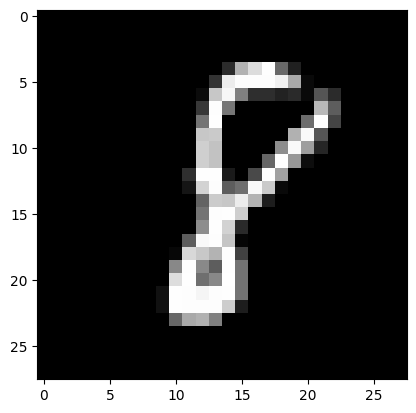

In [81]:
plt.imshow(x_test[520]/255, cmap=plt.cm.gray)

TwoLayerNet in Keras

In [82]:
from tensorflow import keras

In [83]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    keras.layers.Dense(10, activation="softmax")
])

In [84]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [85]:
#Getting the data for training
from tensorflow.keras.datasets import mnist

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [87]:
x_train[0].shape

(28, 28)

In [88]:
x_test.shape

(10000, 28, 28)

In [89]:
keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [90]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [91]:
x_train.shape

(60000, 784)

In [92]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [93]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [94]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [95]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4565 - accuracy: 0.7088
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7122 - accuracy: 0.8515
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5298 - accuracy: 0.8726
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4532 - accuracy: 0.8837
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4104 - accuracy: 0.8903
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8999
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3472 - accuracy: 0.9028
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.9059
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.324

In [96]:
predictions = model.predict(x_test[0:10])

1/1 [==============================] - 0s 51ms/step


In [97]:
import numpy as np

In [98]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 0 4 1 4 9 6 9]


In [99]:
labels = np.argmax(y_test[0:10], axis=1)
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [100]:
predictions == labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

LeNet in Keras:

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [102]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)

In [103]:
lenet = LeNet(batch_size=64, epochs=10)

In [104]:
lenet.train()

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 1.0604 - accuracy: 0.6446
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2350 - accuracy: 0.9299
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1591 - accuracy: 0.9526
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1216 - accuracy: 0.9624
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0973 - accuracy: 0.9702
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0835 - accuracy: 0.9732
Epoch 7/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0700 - accuracy: 0.9782
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0610 - accuracy: 0.9808
Epoch 9/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0554 - accuracy: 0.9827
Epoch 10/10
938/938 [==============================] - 11s 12ms/step - loss: 0.049

In [105]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [106]:
predictions = np.argmax(lenet.model.predict(x_test[0:10]), axis=1)

1/1 [==============================] - 0s 64ms/step


In [107]:
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [108]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [109]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]


In [110]:
# Define the base directory for your handwriting images
base_dir = 'Custom KERAS Samples'

correctCount = 0
wrongCount = 0
totalImages = 0

# Loop through each digit and each image, running module5-3.py
for digit in range(10):
    digit_dir = os.path.join(base_dir, f'Digit {digit}')
    
    if os.path.isdir(digit_dir):
        for filename in os.listdir(digit_dir):
            if filename.endswith('.jpg'):
                image_path = filename
                # print(image_path)
                totalImages+=1
                result = subprocess.run(["python","module8.py",image_path,str(filename)[0]],capture_output=True,text=True)
                output = result.stdout.strip()
                # print(output)
                if "Success" in output:
                    correctCount+=1
                else:
                    wrongCount+=1
            # if totalImages==10: break
        # if totalImages==10: break

print(f'In total there are {totalImages} number of images out of which there are {correctCount} images predicted correctly and there are {wrongCount} images predicted wrongly.')

In total there are 50 number of images out of which there are 42 images predicted correctly and there are 8 images predicted wrongly.
